In [23]:
import numpy as np
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, VectorField
from pde import FieldCollection, PDEBase, CartesianGrid
from scipy.stats import multivariate_normal
# Import required modules for plotting
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy.stats import multivariate_normal


The fokker planck equation can be written as
$$
\begin{align}
    \frac{\partial p}{\partial t} = -\nabla \cdot (p({\bf x},t) \nu({\bf x})) + \frac{1}{2} \nabla \cdot \nabla (D p({\bf x}, t))
\end{align}
$$

In [24]:
def plot2d(data1):
    fig = plt.figure()
    plt.imshow(data1, origin='lower')
    plt.colorbar()
    #plt.plot(data1[0], data1[1])
    plt.show()

In [25]:
np.random.seed(42)

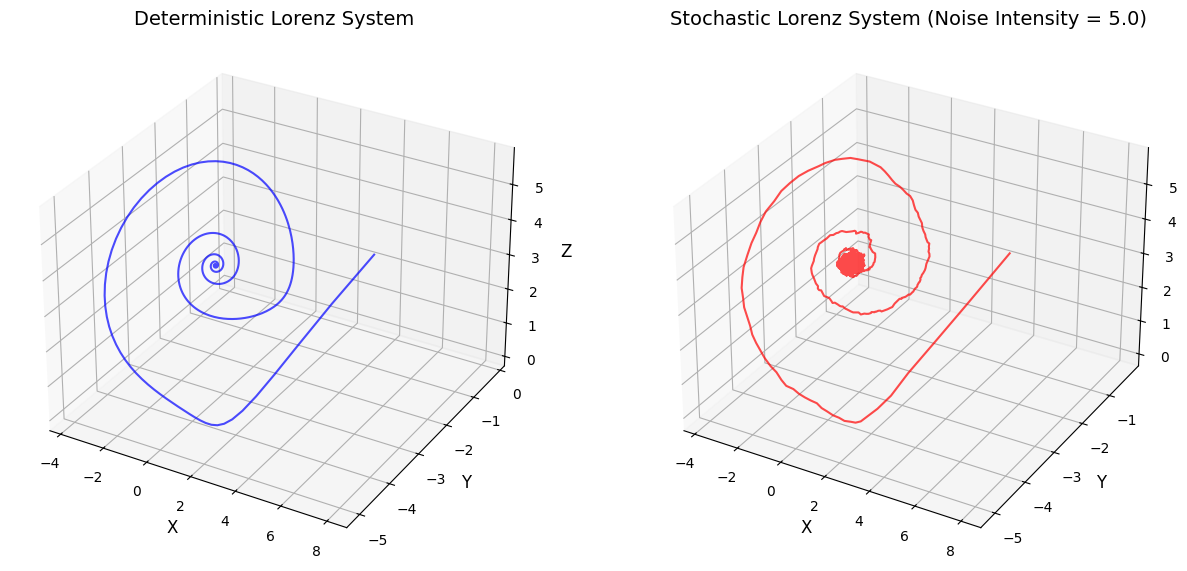

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def lorenz_stochastic(t, state, sigma, rho, beta, noise_intensity):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    dxdt += noise_intensity * np.random.normal(0, 1)
    dydt += noise_intensity * np.random.normal(0, 1)
    dzdt += noise_intensity * np.random.normal(0, 1)
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 7.9654345876543
rho =  6.765434567
beta =  3.9432          # PARAMETERS

# Initial conditions
initial_state = [20, -10, 14.7654]

# Time parameters
t0 = 0
tf = 25
dt = 0.01
num_steps = int((tf - t0) / dt)
t = np.linspace(t0, tf, num_steps)

# Array to store solutions
X = np.zeros((num_steps, 3))
X[0] = initial_state

# Solve the deterministic Lorenz system
for i in range(num_steps - 1):
    X[i + 1] = X[i] + np.array(lorenz(t[i], X[i], sigma, rho, beta)) * dt

# Array to store solutions with noise intensity 50
X_noise = np.zeros((num_steps, 3))
X_noise[0] = initial_state

# Euler-Maruyama method for stochastic differential equations with noise intensity 50
noise_intensity = 5.0
for i in range(num_steps - 1):
    X_noise[i + 1] = X_noise[i] + np.array(lorenz_stochastic(t[i], X_noise[i], sigma, rho, beta, noise_intensity)) * dt

# Plotting
fig = plt.figure(figsize=(15, 7))

# 3D plot without noise
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(X[:, 0]/2.5, X[:, 1]/2.5, X[:, 2]/2.5, color='b', alpha=0.7)
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_title('Deterministic Lorenz System', fontsize=14)
ax1.grid(True)

# 3D plot with noise intensity 50
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(X_noise[:, 0]/2.5, X_noise[:, 1]/2.5, X_noise[:, 2]/2.5, color='r', alpha=0.7)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_zlabel('Z', fontsize=12)
ax2.set_title('Stochastic Lorenz System (Noise Intensity = 5.0)', fontsize=14)
ax2.grid(True)

plt.show()


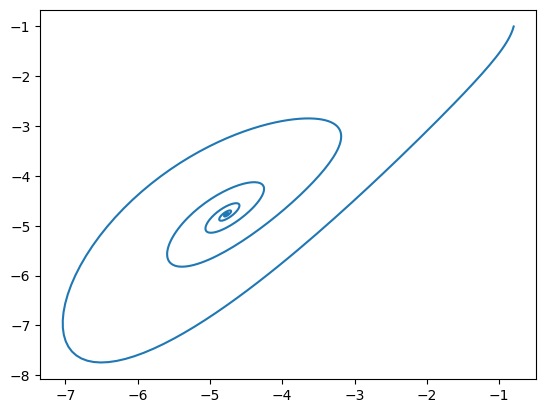

In [3]:
plt.plot(X[:, 0], X[:, 1])

In [326]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.ndimage import gaussian_filter

# Define the Lorenz system
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Parameters
sigma = 7.9654345876543
rho =  6.765434567
beta =  0.1    

# Initial conditions
xyz0 = [3, 3, 3]

# Time vector
t_span = (0,40)
t_eval = np.linspace(*t_span, 10000000)

# Solve the system
sol = solve_ivp(lorenz, t_span, xyz0, args=(sigma, rho, beta), t_eval=t_eval)

# Create 3D histogram
hist, xedges, yedges = np.histogram2d(sol.y[0], sol.y[1], bins=350, density=True)
hist_smoothed = gaussian_filter(hist, sigma=7)  # Adjust sigma as needed for desired smoothing

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel() 
ypos = ypos.ravel() 
zpos = np.zeros_like(xpos) / np.trapz(hist_smoothed.ravel())
dx = dy = np.ones_like(zpos)
dz =  hist_smoothed.ravel()

# Save histogram data to CSV file
data = np.vstack((dz, xpos, ypos)).T
np.savetxt('lorenz_hist.csv', data, delimiter=',')



In [327]:
np.trapz(hist.ravel())

2420.659717609566

In [328]:

len(hist.ravel())

122500

In [329]:
# Time vector
t_span = (0,0.2)
t_eval = np.linspace(*t_span, 10000000)

# Solve the system
sol = solve_ivp(lorenz, t_span, xyz0, args=(sigma, rho, beta), t_eval=t_eval)

# Create 3D histogram
hist_1, xedges_1, yedges_1 = np.histogram2d(sol.y[0], sol.y[1], bins=350, density=True)
hist_smoothed_1 = gaussian_filter(hist_1, sigma=7)  # Adjust sigma as needed for desired smoothing

xpos_1, ypos_1 = np.meshgrid(xedges_1[:-1], yedges_1[:-1], indexing="ij")
xpos_1 = xpos_1.ravel()
ypos_1 = ypos_1.ravel() 
zpos_1 = np.zeros_like(xpos_1) / np.trapz(hist_smoothed_1.ravel())
dx_1 = dy_1 = np.ones_like(zpos_1)
dz_1 =  hist_smoothed_1.ravel()

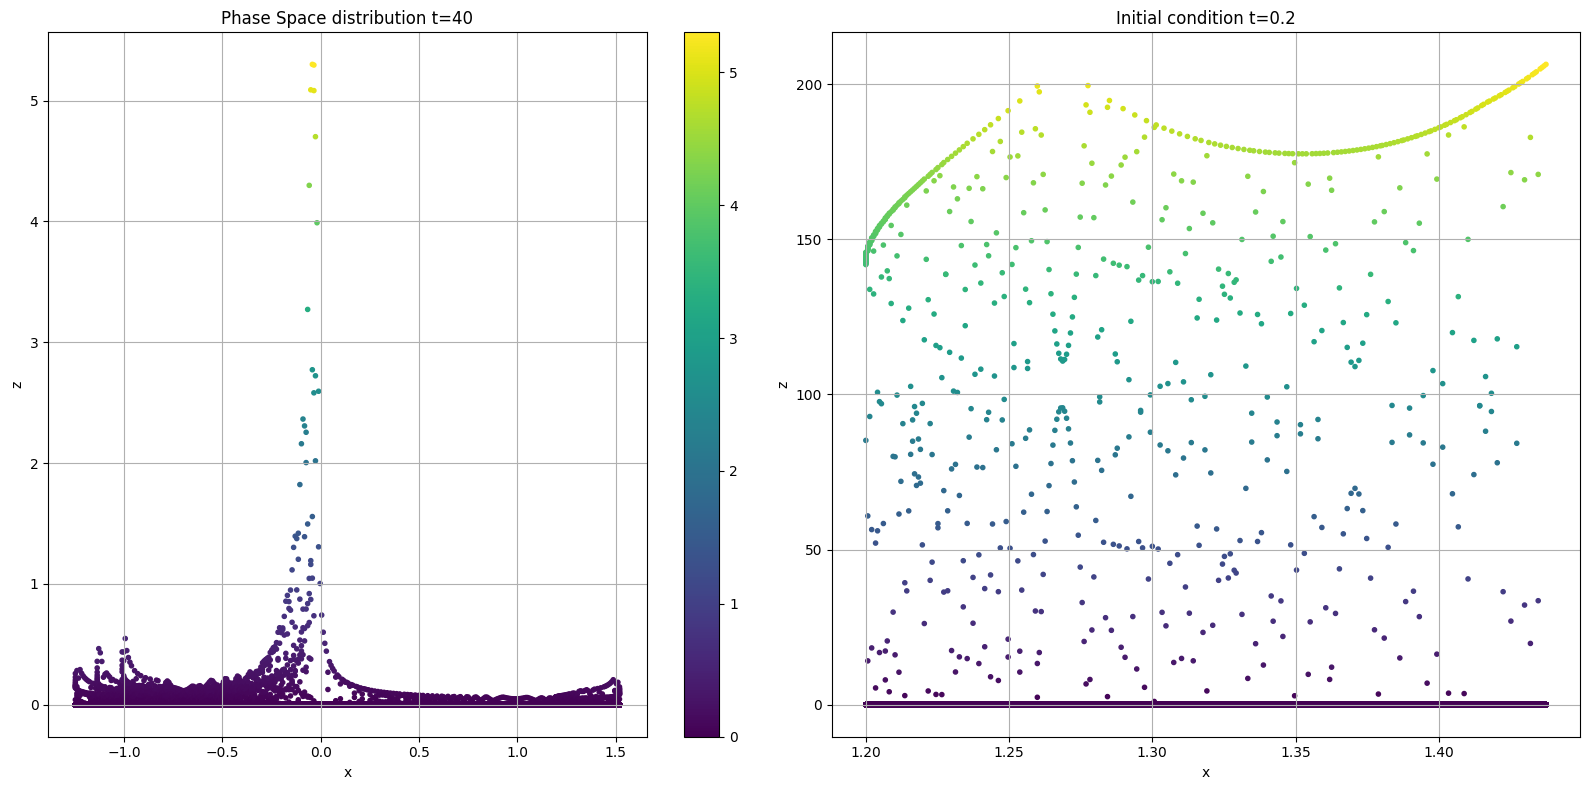

In [330]:
# Plotting
plt.figure(figsize=(16, 8))
hist[hist > 20] = 0
# Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(xpos/2.5, hist.ravel()/2.5, c=hist.ravel()/2.5, marker='.')
plt.colorbar()  # Add a colorbar to show the mapping of values to colors
plt.xlabel('x')
plt.ylabel('z')
plt.title('Phase Space distribution t=40')
plt.grid(True)

# Histogram plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(xpos_1/2.5, hist_1.ravel()/2.5, c=hist_1.ravel()/2.5, marker='.')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Initial condition t=0.2')
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
#plt.scatter(ypos ,
#            hist.ravel(), c = hist.ravel())

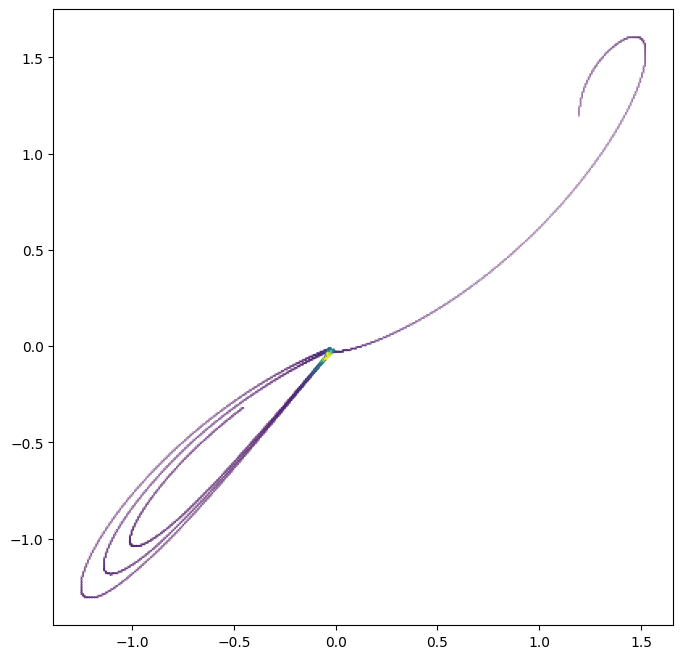

In [331]:
# Normalize data
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize = (8,8))
# Scatter plot with adjusted color mapping
plt.scatter(xpos/2.5, ypos/2.5, hist.ravel()/2.5, c=hist.ravel()/2.5, alpha=1)
plt.show()

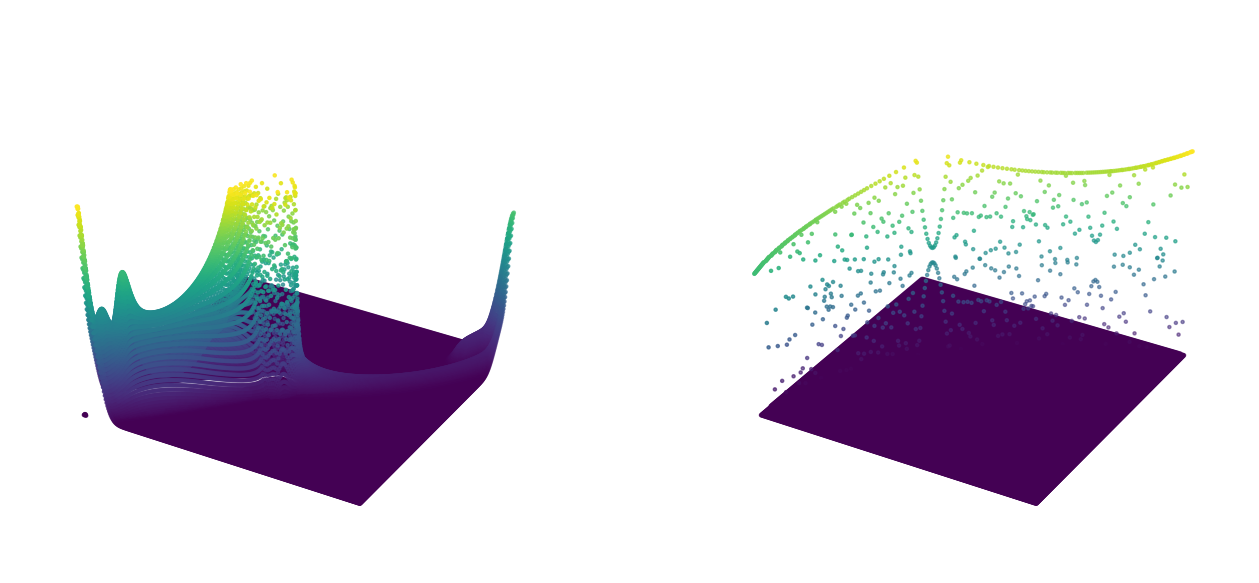

In [332]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming xpos, ypos, dz are defined somewhere in your code

# Create a figure and 3D subplot
fig = plt.figure(figsize=(16, 8))

# 3D scatter plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
dz[dz > 0.1] = 0
sc = ax1.scatter(xpos, ypos, dz, c=dz, marker='.')
ax1.set_axis_off()  # Hide axes for 3D plot

# 2D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(xpos_1, ypos_1, hist_1.ravel(), c=hist_1.ravel(), marker='.')
ax2.set_axis_off()  # Hide axes for 2D plot

plt.show()
